# Validation data plots

Plots using data from the MAPPIT and GPCA tests.

In [1]:
from collections import OrderedDict

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib.legend_handler import HandlerPatch
from matplotlib_venn import venn2, venn3
import matplotlib as mpl

from custom_settings import *
from utils import load_space_iii, validation_plot


%matplotlib inline

In [2]:
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7.0
mpl.rcParams['savefig.dpi'] = 500

In [3]:
val = pd.read_csv('../data/processed/validation_processed.tsv', sep='\t')
val['pair'] = val['orf_id_a'].astype(str) + '_' + val['orf_id_b'].astype(str)

In [4]:
val_m = pd.read_csv('../data/processed/validation_merged.tsv', sep='\t')

MAPPIT
HuRI: n=2281	Lit-BM: n=383	RRS: n=475
GPCA
HuRI: n=1639	Lit-BM: n=382	RRS: n=465


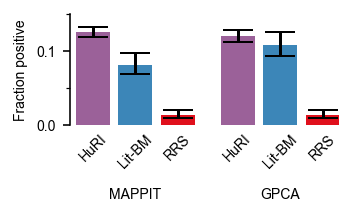

In [5]:
cols = {'HuRI': HURI_COLOR, 'Lit-BM': LIT_COLOR, 'RRS': RRS_COLOR}
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(2.5, 2)
for i, assay in enumerate(['MAPPIT', 'GPCA']):
    rows = OrderedDict([('HuRI', (val_m['assay'] == assay) & 
                                      (val_m['source'].str.startswith('Hs'))),
                        ('Lit-BM', (val_m['assay'] == assay) &
                                   (val_m['source'].isin(['lit_bm_2013_rand250', 'lit_bm_2013_rand400']))),
                        ('RRS', (val_m['assay'] == assay) & 
                                (val_m['source'] == 'RRS'))])
    validation_plot(data=val_m,
                         selections=list(rows.values()),
                         labels=list(rows.keys()),
                         ax=axes[i],
                         colors=list(cols.values()),
                         draw_numbers=False)
    print(assay)
    print('\t'.join(['{}: n={}'.format(ds, val_m.loc[rs, 'result'].notnull().sum()) for ds, rs in rows.items()]))
    axes[i].set_ylim((0., 0.15))
    axes[i].xaxis.set_tick_params(rotation=45)
    axes[i].xaxis.set_tick_params(length=0.)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].set_facecolor('1.')
axes[1].set_yticks([])
axes[1].set_yticks([], minor=True)
axes[1].set_ylabel('')
axes[1].spines['left'].set_visible(False)
axes[0].text(1, -0.1, 'MAPPIT', ha='center')
axes[1].text(1, -0.1, 'GPCA', ha='center')
plt.tight_layout(w_pad=1)
for fmt in FORMATS:
    plt.savefig('../figures/validation_merged_9screens' + fmt)

For the screen pairs they were done in 5 experiments, 3 (Hvs01/2/3) for the first screen, and 1 each for screens 4-6 and 7-9 (Hvs04 / Hvs06).

Screen 1: n=280	Lit-BM: n=159	RRS: n=304
Screen 2: n=271	Lit-BM: n=157	RRS: n=307
Screen 3: n=206	Lit-BM: n=101	RRS: n=235
Screen 4: n=246	Screen 5: n=244	Screen 6: n=229	Lit-BM: n=274	RRS: n=265
Screen 7: n=236	Screen 8: n=233	Screen 9: n=239	Lit-BM: n=182	RRS: n=331


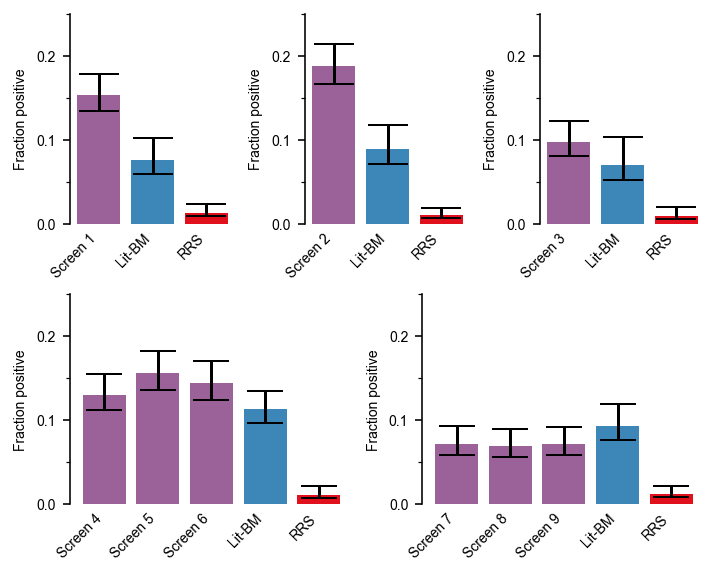

In [6]:
def validation_by_screen_by_experiment(assay):
    colors = {'Screen {}'.format(i): HURI_COLOR for i in range(1, 10)}
    colors['Lit-BM'] = LIT_COLOR
    colors['RRS'] = RRS_COLOR
    fig, _axes = plt.subplots(3, 3)
    axes = [plt.subplot2grid((2, 6), (0, 0), colspan=2),
            plt.subplot2grid((2, 6), (0, 2), colspan=2),
            plt.subplot2grid((2, 6), (0, 4), colspan=2),
            plt.subplot2grid((2, 6), (1, 0), colspan=3),
            plt.subplot2grid((2, 6), (1, 3), colspan=3)]
    fig.set_size_inches(5, 4)
    for i in range(1, 4):
        sb = 'Hvs0' + str(i)
        rows = OrderedDict([('Screen ' + str(i), (val['assay'] == assay) &
                                                         (val['standard_batch'] == sb) &
                                                         (val['source'] == 'Hs0' + str(i))),
                            ('Lit-BM', (val['assay'] == assay) &
                                       (val['standard_batch'] == sb) &
                                       (val['source'] == 'Lit-BM')),
                            ('RRS', (val['assay'] == assay) &
                                    (val['standard_batch'] == sb) &
                                    (val['source'] == 'RRS'))])
        validation_plot(data=val, 
                             selections=list(rows.values()),
                             labels=list(rows.keys()),
                             ax=axes[i - 1],
                             colors=[colors[k] for k in rows.keys()], 
                             draw_numbers=False)
        print('\t'.join(['{}: n={}'.format(ds, val.loc[rs, 'result'].notnull().sum()) for ds, rs in rows.items()]))
    sb = 'Hvs04'
    rows = OrderedDict([('Screen ' + str(i), (val['assay'] == assay) &
                                                     (val['standard_batch'] == sb) &
                                                     (val['source'] == 'Hs0' + str(i)))
                       for i in range(4, 7)] +
                       [
                        ('Lit-BM', (val['assay'] == assay) &
                                   (val['standard_batch'] == sb) &
                                   (val['source'] == 'Lit-BM')),
                        ('RRS', (val['assay'] == assay) &
                                (val['standard_batch'] == sb) &
                                (val['source'] == 'RRS'))])
    validation_plot(data=val,
                         selections=list(rows.values()),
                         labels=list(rows.keys()),
                         ax=axes[3],
                         colors=[colors[k] for k in rows.keys()],
                         draw_numbers=False)
    print('\t'.join(['{}: n={}'.format(ds, val.loc[rs, 'result'].notnull().sum()) for ds, rs in rows.items()]))
    sb = 'Hvs06'
    rows = OrderedDict([('Screen ' + str(i), (val['assay'] == assay) &
                                                     (val['standard_batch'] == sb) &
                                                     (val['source'] == 'Hs0' + str(i)))
                       for i in range(7, 10)] +
                       [
                        ('Lit-BM', (val['assay'] == assay) &
                                   (val['standard_batch'] == sb) &
                                   (val['source'] == 'Lit-BM')),
                        ('RRS', (val['assay'] == assay) &
                                (val['standard_batch'] == sb) &
                                (val['source'] == 'RRS'))])
    if any([r.sum() > 0 for r in rows.values()]):
        validation_plot(data=val,
                             selections=list(rows.values()),
                             labels=list(rows.keys()),
                             ax=axes[4],
                             colors=[colors[k] for k in rows.keys()],
                             draw_numbers=False)
        print('\t'.join(['{}: n={}'.format(ds, val.loc[rs, 'result'].notnull().sum()) for ds, rs in rows.items()]))
    else:
        axes[4].axis('off')

    for ax in axes:
        ax.set_ylim((0., 0.25))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.xaxis.set_tick_params(length=0.)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_facecolor('1.')
        ax.set_title('')
    
    
validation_by_screen_by_experiment('MAPPIT')
plt.tight_layout()
for fmt in FORMATS:
    plt.savefig('../figures/validation_mappit_by_screen_by_experiment' + fmt)

Screen 1: n=252	Lit-BM: n=155	RRS: n=314
Screen 2: n=255	Lit-BM: n=150	RRS: n=309
Screen 3: n=255	Lit-BM: n=142	RRS: n=302
Screen 4: n=278	Screen 5: n=257	Screen 6: n=263	Lit-BM: n=590	RRS: n=604


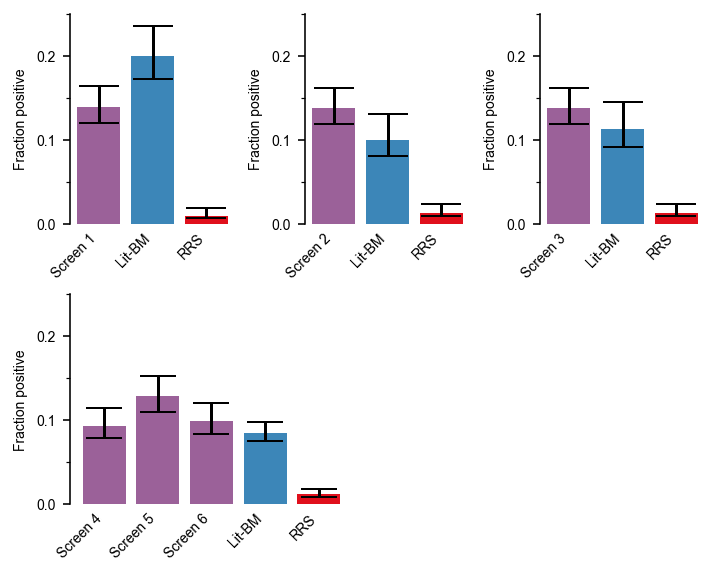

In [7]:
validation_by_screen_by_experiment('GPCA')
plt.tight_layout()
for fmt in FORMATS:
    plt.savefig('../figures/validation_gpca_by_screen_by_experiment' + fmt)

In [8]:
lit = pd.read_csv('../data/processed/lit_bm_17_orf_id.tsv', sep='\t')
csi = pd.read_csv('../data/processed/Supplementary Table 16.txt', sep='\t')
csi = pd.merge(csi, lit, 
               how='left',
               left_on=['orf_id_a', 'orf_id_b'], right_on=['orf_id_a', 'orf_id_b'],
               suffixes=('', '_lit'))

HuRI
1 screens: n=759	2 screens: n=407	3 screens: n=298
1 screens: n=793	2 screens: n=328	3 screens: n=197
1 screens: n=497	2 screens: n=259	3 screens: n=135
Lit_and_HuRI
1 screens: n=325	2 screens: n=334	3 screens: n=440
1 screens: n=310	2 screens: n=138	3 screens: n=43
1 screens: n=141	2 screens: n=56	3 screens: n=22


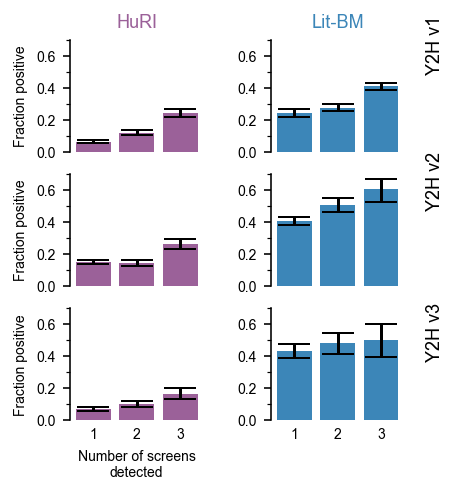

In [9]:
ymax = 0.7
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(3, 3.5)
plt.subplots_adjust(wspace=0.5)
for i, cat in enumerate(['HuRI', 'Lit_and_HuRI']):
    print(cat)
    for j, assay_id in enumerate([1, 2, 3]):
        rows = {str(i) + ' screens': (csi['Y2H_assay_version'] == assay_id) &
                                     (csi['category'] == cat) &
                                     (csi['num_screens'] == i)
                for i in range(1, 4)}
        colors = {str(i) + ' screens': {'HuRI': HURI_COLOR, 'Lit_and_HuRI': LIT_COLOR}[cat] for i in range(1, 4)}
        validation_plot(data=csi, 
                             selections=list(rows.values()),
                             labels=list(rows.keys()),
                             result_column='result',
                             ax=axes[j, i],
                             y_max=ymax,
                             colors=list(colors.values()),
                             draw_numbers=False)
        print('\t'.join(['{}: n={}'.format(ds, csi.loc[rs, 'result'].notnull().sum()) for ds, rs in rows.items()]))
        ax = axes[j, i]
        ax.xaxis.set_tick_params(length=0.)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_facecolor('1.')
        ax.set_xticklabels([])
        ax.set_yticks(np.arange(0., 0.71, 0.2))
        ax.set_yticks(np.arange(0., 0.71, 0.1), minor=True)
        
axes[2, 1].set_xticklabels([1, 2, 3], rotation=0)
axes[2, 0].set_xticklabels([1, 2, 3], rotation=0)
axes[2, 0].set_xlabel('Number of screens\ndetected')
axes[0, 1].set_ylabel('')
axes[1, 1].set_ylabel('')
axes[2, 1].set_ylabel('')


fig.text(0.95, 0.82, 'Y2H v1', fontsize=9, rotation=90)
fig.text(0.95, 0.55, 'Y2H v2', fontsize=9, rotation=90)
fig.text(0.95, 0.25, 'Y2H v3', fontsize=9, rotation=90)

axes[0, 0].set_title('HuRI', color=HURI_COLOR, fontsize=9)
axes[0, 1].set_title('Lit-BM', color=LIT_COLOR, fontsize=9)


for fmt in FORMATS:
    plt.savefig('../figures/validation_mappit_by_num_screens' + fmt,
                bbox_inches='tight')

Evidence count ≥ 3
1 screens: n=61	2 screens: n=56	3 screens: n=105
Evidence count ≥ 4
1 screens: n=48	2 screens: n=44	3 screens: n=74
Evidence count ≥ 5
1 screens: n=40	2 screens: n=34	3 screens: n=59
Evidence count ≥ 6
1 screens: n=31	2 screens: n=28	3 screens: n=45
Evidence count ≥ 7
1 screens: n=25	2 screens: n=24	3 screens: n=34


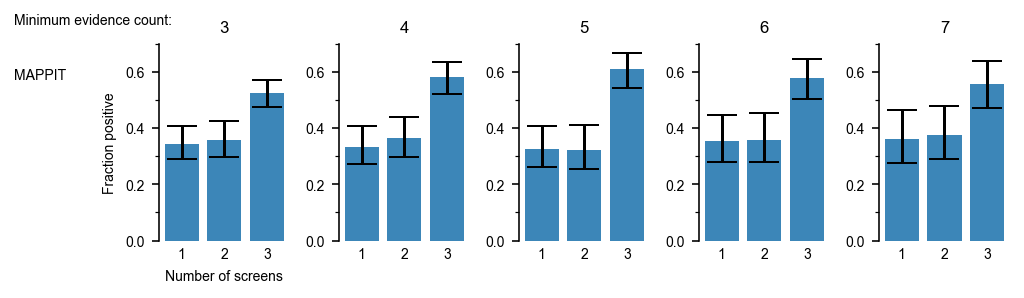

In [10]:
def val_by_n_screens_restrict_lit_evid(n_evid, val_assay='mappit', ymax=0.7, ax=None):
    cat = 'Lit_and_HuRI'
    assay_id = 1
    rows = {str(i) + ' screens': (csi['Y2H_assay_version'] == assay_id) &
                                 (csi['category'] == cat) &
                                 ((csi['category'] == 'HuRI') | 
                                  (csi['category_lit'].isin(['Lit-BM', 'Lit-BM-HT']) & (csi['n_evidences'] > n_evid)))  &
                                 (csi['num_screens'] == i)
            for i in range(1, 4)}
    colors = {str(i) + ' screens': {'HuRI': HURI_COLOR, 'Lit_and_HuRI': LIT_COLOR}[cat] for i in range(1, 4)}
    validation_plot(data=csi,
                         selections=list(rows.values()),
                         result_column='result',
                         ax=ax,
                         y_max=ymax,
                         colors=list(colors.values()),
                         draw_numbers=False)
    print('Evidence count ≥', n_evid)
    print('\t'.join(['{}: n={}'.format(ds, csi.loc[rs, 'result'].notnull().sum()) for ds, rs in rows.items()]))
    ax.xaxis.set_tick_params(length=0.)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_facecolor('1.')


n_evidences = list(range(3, 8))
fig, axes = plt.subplots(1, len(n_evidences))
# figure size
fig.set_size_inches(6.5, 2)
for n in n_evidences:
    val_by_n_screens_restrict_lit_evid(n, 'mappit', 0.7, axes[n - 3])
for ax in axes.flatten():
    ax.set_yticks([0.1, 0.3, 0.5, 0.7], minor=True)
    ax.set_yticks([0., 0.2, 0.4, 0.6])
for ax in axes[1:].flatten():
    ax.set_ylabel('')
for ax in axes:
    ax.set_xticklabels(['1', '2', '3'], rotation=0)
for ax, n in zip(axes, n_evidences):
    ax.set_title(str(n))
axes[0].set_xlabel('Number of screens')
fig.text(-0.08, 0.75, 'MAPPIT')
fig.text(-0.08, 0.938, 'Minimum evidence count:')
plt.tight_layout()
for fmt in FORMATS:
    plt.savefig('../figures/validation_num_screens_lit_bm' + fmt,
                bbox_inches='tight')

In [11]:
gsm_val = pd.read_csv('../data/processed/Supplementary Table 6.txt', sep='\t')

In [12]:
gsm_val.head()

,orf_id_a,orf_id_b,result,experiment,source
0,61,53120,0.0,testing_y2h_v3,Lit_BM_13
1,61,53120,0.0,testing_y2h_v1,Lit_BM_13
2,61,53120,0.0,testing_y2h_v2,Lit_BM_13
3,69,3380,0.0,testing_y2h_v3,Lit_BM_13
4,69,3380,0.0,testing_y2h_v1,Lit_BM_13


Y2H v1
Y2H: n=395	Lit-BM: n=216	RRS: n=349
Y2H v2
Y2H: n=161	Lit-BM: n=214	RRS: n=175
Y2H v3
Y2H: n=310	Lit-BM: n=211	RRS: n=315


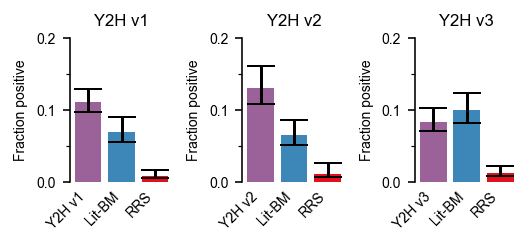

In [13]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(3.7, 1.7)
ymax = 0.2
assay = 'MAPPIT'
gsm_v1_exp = [(gsm_val['experiment'] == 'testing_y2h_v1') &
              (gsm_val['source'] == s) for s in ['test_space_y2h_v1',
                                             'Lit_BM_13',
                                             'RRS']]
gsm_v2_exp = [(gsm_val['experiment'] == 'testing_y2h_v2') &
              (gsm_val['source'] == s) for s in ['test_space_y2h_v2',
                                             'Lit_BM_13',
                                             'RRS']]
gsm_v3_exp = [(gsm_val['experiment'] == 'testing_y2h_v3') &
              (gsm_val['source'] == s) for s in ['test_space_y2h_v3',
                                             'Lit_BM_13',
                                             'RRS']]
validation_plot(data=gsm_val,
                     selections=gsm_v1_exp,
                     ax=axes[0],
                     y_max=ymax,
                     labels=['Y2H v1', 'Lit-BM', 'RRS'],
                     colors=[HURI_COLOR, LIT_COLOR, RRS_COLOR],
                     draw_numbers=False)
validation_plot(data=gsm_val,
                     selections=gsm_v2_exp,
                     ax=axes[1],
                     y_max=ymax,
                     labels=['Y2H v2', 'Lit-BM', 'RRS'],
                     colors=[HURI_COLOR, LIT_COLOR, RRS_COLOR],
                     draw_numbers=False)
validation_plot(data=gsm_val,
                     selections=gsm_v3_exp,
                     ax=axes[2],
                     y_max=ymax,
                     labels=['Y2H v3', 'Lit-BM', 'RRS'],
                     colors=[HURI_COLOR, LIT_COLOR, RRS_COLOR],
                     draw_numbers=False)
dataset_names = ['Y2H', 'Lit-BM', 'RRS']
print('Y2H v1')
print('\t'.join(['{}: n={}'.format(ds, gsm_val.loc[rs, 'result'].notnull().sum()) for ds, rs in zip(dataset_names, gsm_v1_exp)]))
print('Y2H v2')
print('\t'.join(['{}: n={}'.format(ds, gsm_val.loc[rs, 'result'].notnull().sum()) for ds, rs in zip(dataset_names, gsm_v2_exp)]))
print('Y2H v3')
print('\t'.join(['{}: n={}'.format(ds, gsm_val.loc[rs, 'result'].notnull().sum()) for ds, rs in zip(dataset_names, gsm_v3_exp)]))
for ax in axes.flatten():
    ax.xaxis.set_tick_params(length=0.)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_facecolor('1.')
axes[0].set_title('Y2H v1')
axes[1].set_title('Y2H v2')
axes[2].set_title('Y2H v3')
plt.tight_layout()
for fmt in FORMATS:
    plt.savefig('../figures/gsm_gsm_validation_mappit' + fmt,
                bbox_inches='tight')